In [1]:
# Import Libraries and cifar10 dataset
import tensorflow.keras 
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras import datasets, layers, models
from keras.utils import np_utils
from keras import regularizers
from keras.layers import Dense, Dropout, BatchNormalization
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, Dropout  
from tensorflow.keras.layers import AveragePooling2D, MaxPooling2D, BatchNormalization
from keras.utils.vis_utils import plot_model
import seaborn as sns
import visualkeras
from sklearn.metrics import precision_score, roc_curve, recall_score, f1_score, roc_auc_score, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

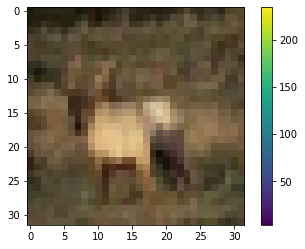

In [3]:
plt.figure()
plt.imshow(x_train[3])
plt.colorbar()

In [4]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


C:\Users\626854\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\626854\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


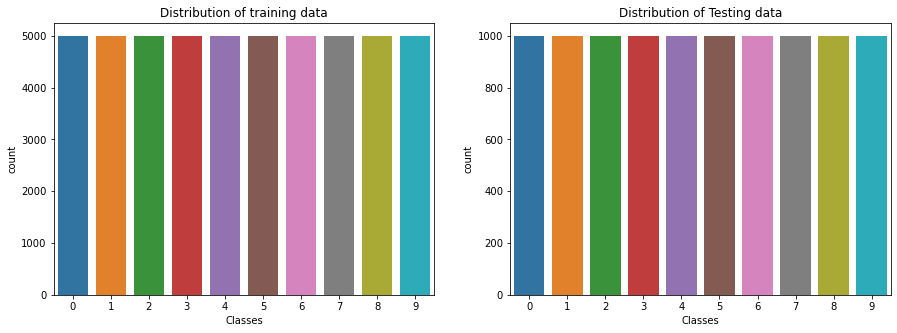

In [5]:
fig, axs = plt.subplots(1,2,figsize=(15,5)) 
# Count plot for training set
sns.countplot(y_train.ravel(), ax=axs[0])
axs[0].set_title('Distribution of training data')
axs[0].set_xlabel('Classes')
# Count plot for testing set
sns.countplot(y_test.ravel(), ax=axs[1])
axs[1].set_title('Distribution of Testing data')
axs[1].set_xlabel('Classes')
plt.show()

In [6]:
# Creating a list of all the class labels
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

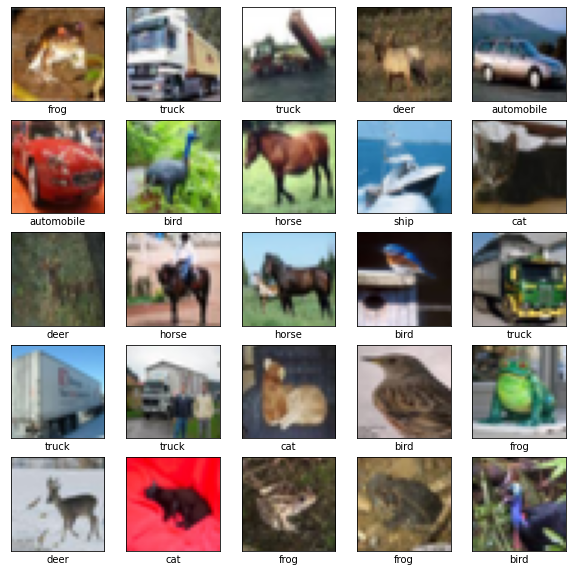

In [7]:
# Visualizing some of the images from the training dataset
plt.figure(figsize=[10,10])
for i in range (25):    # for first 25 images
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[y_train[i][0]])

plt.show()

In [8]:
# Normalize the data
x_train = x_train/255
x_test = x_test/255

# One hot encoding 
y_train = tensorflow.keras.utils.to_categorical(y_train, 10)
y_test = tensorflow.keras.utils.to_categorical(y_test, 10)

## CNN Model 1

In [9]:
# Baseline model from template
model = Sequential()
model.add(Conv2D(filters = 128, kernel_size = (2, 2),  input_shape = (32, 32, 3), data_format = 'channels_last'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(units = 10, activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 31, 31, 128)       1664      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 128)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 128)       0         
                                                                 
 batch_normalization (BatchN  (None, 15, 15, 128)      512       
 ormalization)                                                   
                                                                 
 flatten (Flatten)           (None, 28800)             0         
                                                                 
 dense (Dense)               (None, 10)                2

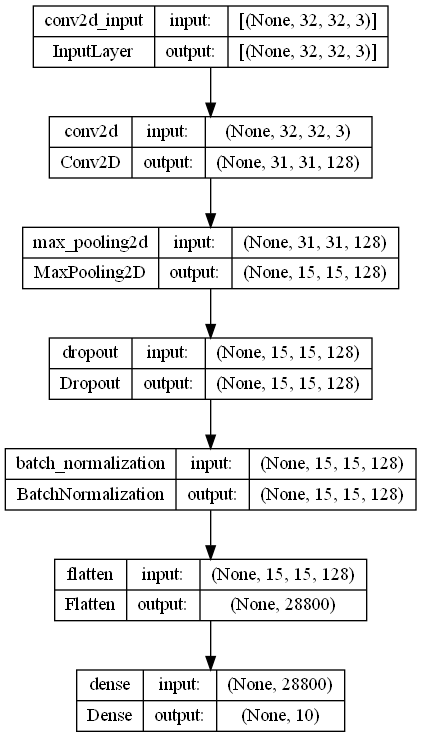

In [10]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

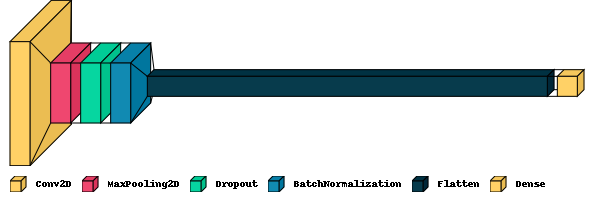

In [11]:
visualkeras.layered_view(model, legend=True)

In [12]:
model.compile(loss = 'categorical_crossentropy', 
              optimizer = tensorflow.keras.optimizers.Adadelta(), 
              metrics = ['accuracy'])

In [13]:
history = model.fit(x_train, y_train, epochs = 10, batch_size = 128, validation_data=(x_test, y_test))

Epoch 1/10
391/391 [==============================] - 34s 86ms/step - loss: 2.5325 - accuracy: 0.1585 - val_loss: 2.1469 - val_accuracy: 0.2412
Epoch 2/10
391/391 [==============================] - 33s 86ms/step - loss: 2.2747 - accuracy: 0.2275 - val_loss: 1.9596 - val_accuracy: 0.3099
Epoch 3/10
391/391 [==============================] - 32s 83ms/step - loss: 2.1750 - accuracy: 0.2571 - val_loss: 1.8933 - val_accuracy: 0.3358
Epoch 4/10
391/391 [==============================] - 33s 84ms/step - loss: 2.1139 - accuracy: 0.2777 - val_loss: 1.8469 - val_accuracy: 0.3547
Epoch 5/10
391/391 [==============================] - 32s 83ms/step - loss: 2.0683 - accuracy: 0.2910 - val_loss: 1.8119 - val_accuracy: 0.3694
Epoch 6/10
391/391 [==============================] - 33s 85ms/step - loss: 2.0388 - accuracy: 0.3026 - val_loss: 1.7845 - val_accuracy: 0.3821
Epoch 7/10
391/391 [==============================] - 32s 82ms/step - loss: 2.0043 - accuracy: 0.3136 - val_loss: 1.7611 - val_accuracy:

In [14]:
score = model.evaluate(x_test, y_test)
print('\n The loss on the test set is: ' + str(score[0]))
print('The accuracy on the test set is: ' + str(score[1]))

313/313 [==============================] - 2s 7ms/step - loss: 1.7100 - accuracy: 0.4069

 The loss on the test set is: 1.7099566459655762
The accuracy on the test set is: 0.40689998865127563


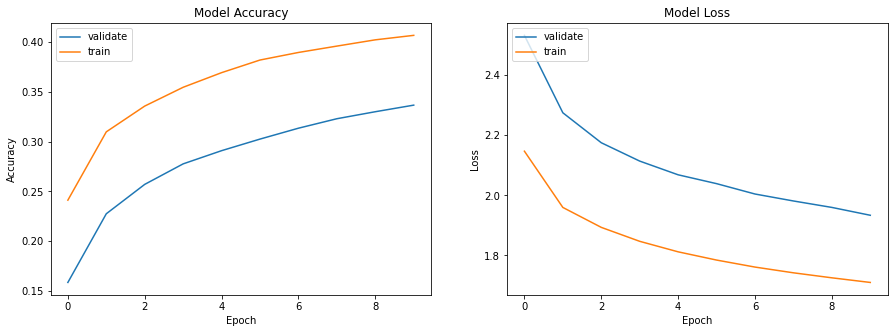

In [15]:
def plotmodelhistory(model): 
    fig, axs = plt.subplots(1,2,figsize=(15,5)) 
    # summarize history for accuracy
    axs[0].plot(history.history['accuracy']) 
    axs[0].plot(history.history['val_accuracy']) 
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy') 
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['validate', 'train'], loc='upper left')
    # summarize history for loss
    axs[1].plot(history.history['loss']) 
    axs[1].plot(history.history['val_loss']) 
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss') 
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['validate', 'train'], loc='upper left')
    plt.show()

plotmodelhistory(history)

## CNN Model 2

In [16]:
# Build layers
model1 = Sequential()
model1.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model1.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model1.add(MaxPooling2D((2, 2)))
model1.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model1.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model1.add(MaxPooling2D((2, 2)))

model1.add(Flatten())
model1.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model1.add(Dense(10, activation='softmax'))

model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 128)       36992     
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 128)       147584    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                  

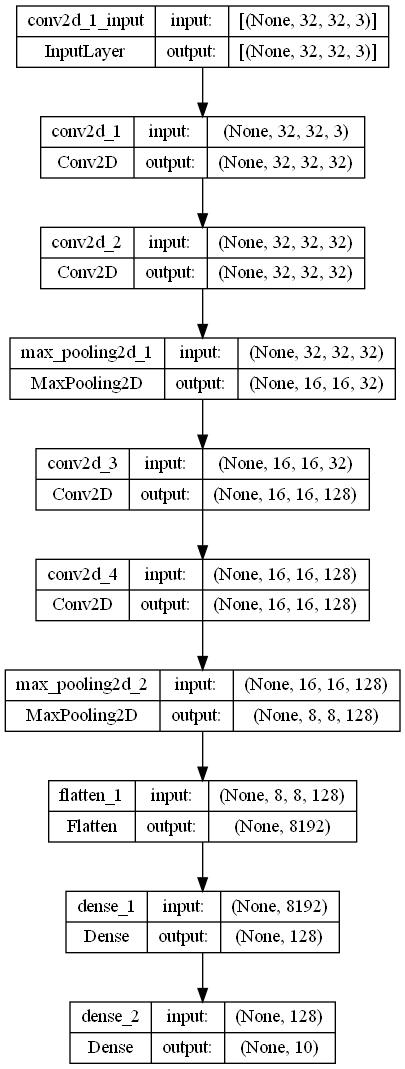

In [17]:
plot_model(model1, to_file='model_plot1.png', show_shapes=True, show_layer_names=True)

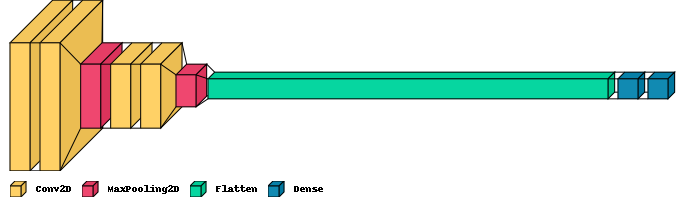

In [18]:
visualkeras.layered_view(model1, legend=True)

In [19]:
# compile model

model1.compile(loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
history_1 = model1.fit(x_train, y_train, epochs = 10, batch_size = 128, validation_data=(x_test, y_test))

Epoch 1/10
391/391 [==============================] - 66s 168ms/step - loss: 1.5912 - accuracy: 0.4513 - val_loss: 1.1845 - val_accuracy: 0.5802
Epoch 2/10
391/391 [==============================] - 66s 169ms/step - loss: 0.9828 - accuracy: 0.6608 - val_loss: 0.9086 - val_accuracy: 0.6839
Epoch 3/10
391/391 [==============================] - 66s 169ms/step - loss: 0.7258 - accuracy: 0.7480 - val_loss: 0.8646 - val_accuracy: 0.7133
Epoch 4/10
391/391 [==============================] - 67s 171ms/step - loss: 0.5317 - accuracy: 0.8145 - val_loss: 1.0226 - val_accuracy: 0.6802
Epoch 5/10
391/391 [==============================] - 66s 169ms/step - loss: 0.3727 - accuracy: 0.8703 - val_loss: 0.9161 - val_accuracy: 0.7366
Epoch 6/10
391/391 [==============================] - 66s 169ms/step - loss: 0.2494 - accuracy: 0.9144 - val_loss: 0.9447 - val_accuracy: 0.7467
Epoch 7/10
391/391 [==============================] - 66s 169ms/step - loss: 0.1631 - accuracy: 0.9439 - val_loss: 1.1658 - val_ac

In [21]:
score1 = model1.evaluate(x_test, y_test)
print('\n The loss on the test set is: ' + str(score1[0]))
print('The accuracy on the test set is: ' + str(score1[1]))

313/313 [==============================] - 6s 19ms/step - loss: 1.9373 - accuracy: 0.7258

 The loss on the test set is: 1.9372588396072388
The accuracy on the test set is: 0.7257999777793884


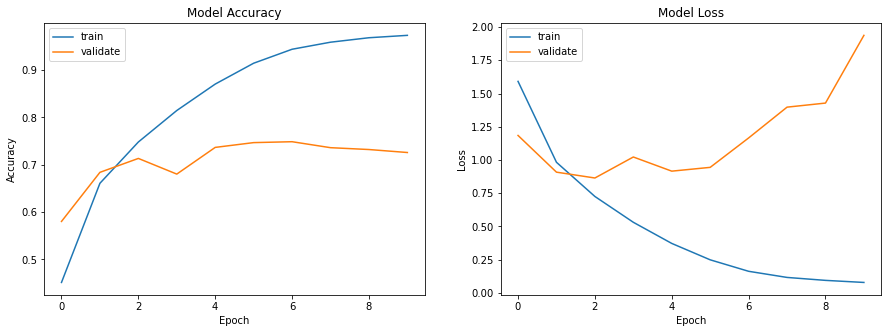

In [22]:
def plotmodelhistory(history): 
    fig, axs = plt.subplots(1,2,figsize=(15,5)) 
    # summarize history for accuracy
    axs[0].plot(history.history['accuracy']) 
    axs[0].plot(history.history['val_accuracy']) 
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy') 
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'validate'], loc='upper left')
    # summarize history for loss
    axs[1].plot(history.history['loss']) 
    axs[1].plot(history.history['val_loss']) 
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss') 
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.show()

plotmodelhistory(history_1)

## CNN Model 3

In [23]:
# example of a 3-block vgg style architecture
model2 = Sequential()
model2.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model2.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model2.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model2.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model2.add(MaxPooling2D((2, 2)))

model2.add(Flatten())
model2.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model2.add(Dense(10, activation='softmax'))

model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                  

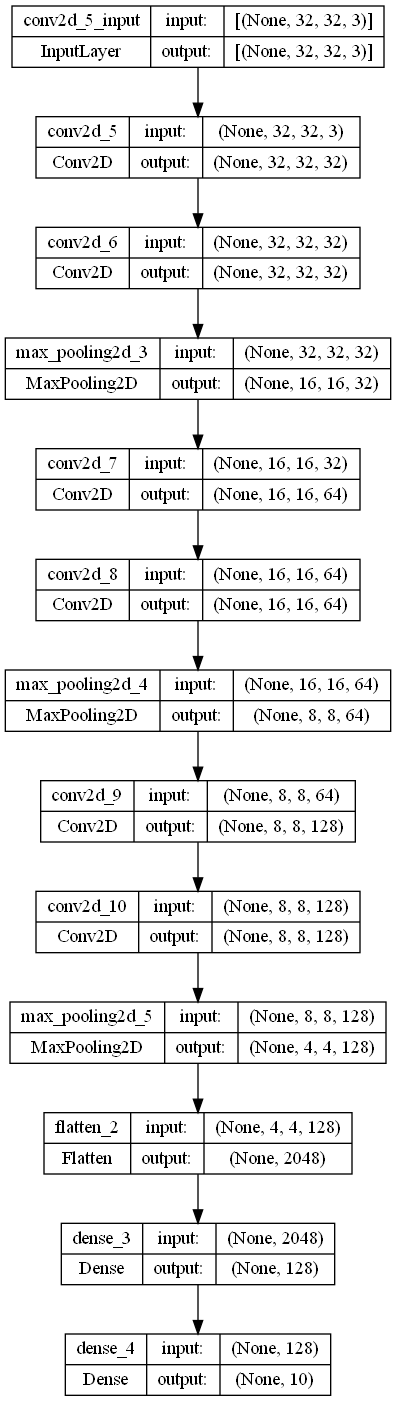

In [24]:
plot_model(model2, to_file='model_plot2.png', show_shapes=True, show_layer_names=True)

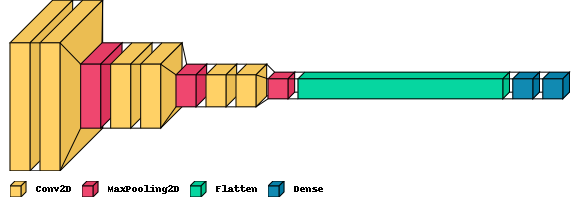

In [25]:
visualkeras.layered_view(model2, legend=True)

In [26]:
# compile model
model2.compile(loss='categorical_crossentropy', metrics=['accuracy'])

In [27]:
history_2 = model2.fit(x_train, y_train, epochs = 10, batch_size = 128, validation_data=(x_test, y_test))

Epoch 1/10
391/391 [==============================] - 58s 146ms/step - loss: 1.7638 - accuracy: 0.3799 - val_loss: 1.3175 - val_accuracy: 0.5386
Epoch 2/10
391/391 [==============================] - 57s 145ms/step - loss: 1.1544 - accuracy: 0.5940 - val_loss: 1.2285 - val_accuracy: 0.5584
Epoch 3/10
391/391 [==============================] - 57s 145ms/step - loss: 0.8924 - accuracy: 0.6899 - val_loss: 0.9065 - val_accuracy: 0.6850
Epoch 4/10
391/391 [==============================] - 56s 144ms/step - loss: 0.7198 - accuracy: 0.7511 - val_loss: 0.8485 - val_accuracy: 0.7104
Epoch 5/10
391/391 [==============================] - 56s 144ms/step - loss: 0.5738 - accuracy: 0.8016 - val_loss: 0.8467 - val_accuracy: 0.7154
Epoch 6/10
391/391 [==============================] - 56s 144ms/step - loss: 0.4624 - accuracy: 0.8388 - val_loss: 0.8480 - val_accuracy: 0.7412
Epoch 7/10
391/391 [==============================] - 56s 143ms/step - loss: 0.3655 - accuracy: 0.8724 - val_loss: 0.9713 - val_ac

In [28]:
score2 = model2.evaluate(x_test, y_test)
print('\n The loss on the test set is: ' + str(score2[0]))
print('The accuracy on the test set is: ' + str(score2[1]))

313/313 [==============================] - 6s 18ms/step - loss: 1.2438 - accuracy: 0.7206

 The loss on the test set is: 1.2438113689422607
The accuracy on the test set is: 0.7206000089645386


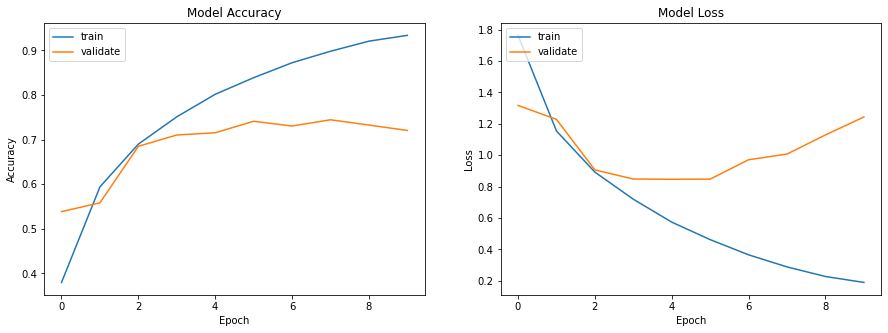

In [29]:
def plotmodelhistory(history): 
    fig, axs = plt.subplots(1,2,figsize=(15,5)) 
    # summarize history for accuracy
    axs[0].plot(history.history['accuracy']) 
    axs[0].plot(history.history['val_accuracy']) 
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy') 
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'validate'], loc='upper left')
    # summarize history for loss
    axs[1].plot(history.history['loss']) 
    axs[1].plot(history.history['val_loss']) 
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss') 
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.show()

plotmodelhistory(history_2)

## CNN Model 4

In [30]:
# Model_3 with Batch Normalization
model3 = Sequential()
model3.add(Conv2D(64,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model3.add(BatchNormalization())
model3.add(Conv2D(64,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model3.add(BatchNormalization())
model3.add(Conv2D(128,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2,2)))
model3.add(Dropout(0.25))
model3.add(Conv2D(128,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model3.add(BatchNormalization())
model3.add(Conv2D(128,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model3.add(BatchNormalization())

model3.add(Flatten())
model3.add(Dense(256, activation='relu'))
model3.add(Dense(10, activation='softmax'))

model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 32, 32, 64)        3136      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 64)       256       
 hNormalization)                                                 
                                                                 
 conv2d_12 (Conv2D)          (None, 32, 32, 64)        65600     
                                                                 
 batch_normalization_2 (Batc  (None, 32, 32, 64)       256       
 hNormalization)                                                 
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 128)       131200    
                                                                 
 batch_normalization_3 (Batc  (None, 32, 32, 128)     

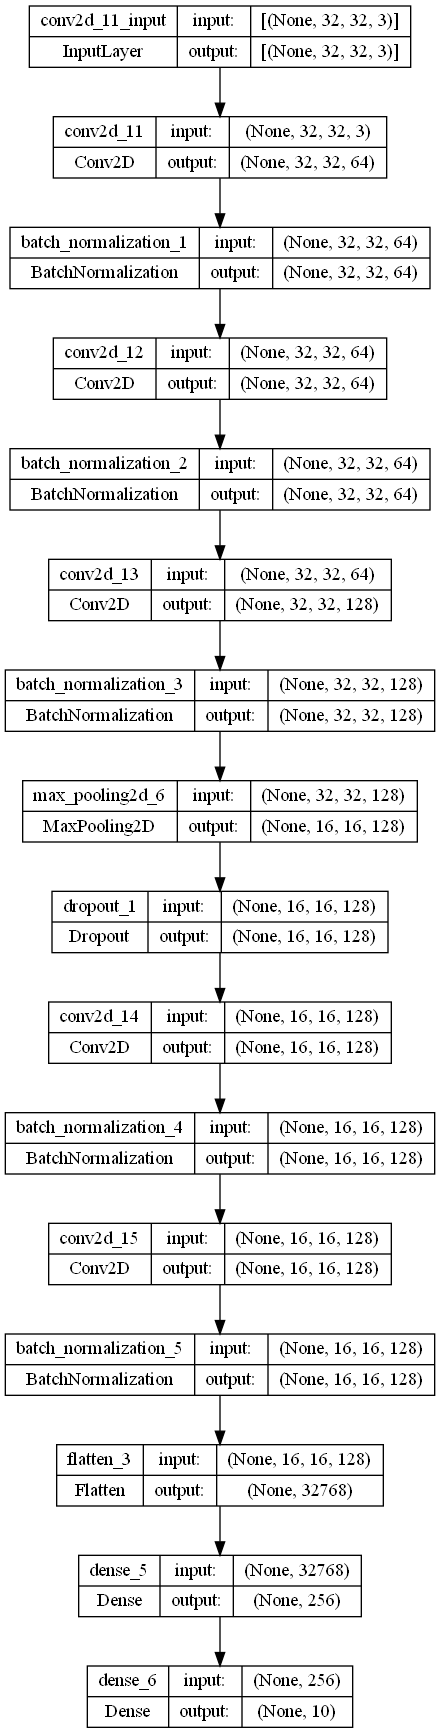

In [31]:
plot_model(model3, to_file='model_plot2.png', show_shapes=True, show_layer_names=True)

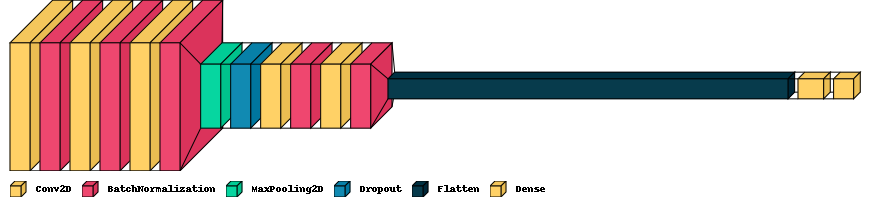

In [32]:
visualkeras.layered_view(model3, legend=True)

In [33]:
model3.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [34]:
history_3 = model3.fit(x_train, y_train, epochs = 10, batch_size = 128, verbose=1, validation_data=(x_test, y_test))

Epoch 1/10
391/391 [==============================] - 373s 951ms/step - loss: 1.4307 - accuracy: 0.5086 - val_loss: 1.7817 - val_accuracy: 0.3856
Epoch 2/10
391/391 [==============================] - 368s 942ms/step - loss: 0.8399 - accuracy: 0.7054 - val_loss: 0.9741 - val_accuracy: 0.6754
Epoch 3/10
391/391 [==============================] - 365s 934ms/step - loss: 0.6342 - accuracy: 0.7793 - val_loss: 0.7810 - val_accuracy: 0.7422
Epoch 4/10
391/391 [==============================] - 359s 918ms/step - loss: 0.4801 - accuracy: 0.8307 - val_loss: 0.8441 - val_accuracy: 0.7317
Epoch 5/10
391/391 [==============================] - 357s 913ms/step - loss: 0.3455 - accuracy: 0.8800 - val_loss: 0.7489 - val_accuracy: 0.7668
Epoch 6/10
391/391 [==============================] - 358s 915ms/step - loss: 0.2388 - accuracy: 0.9172 - val_loss: 0.8534 - val_accuracy: 0.7554
Epoch 7/10
391/391 [==============================] - 360s 921ms/step - loss: 0.1594 - accuracy: 0.9458 - val_loss: 1.0265 -

In [35]:
score3test = model3.evaluate(x_test, y_test)
score3train = model3.evaluate(x_train, y_train)
print('\n The loss on the test set is: ' + str(score3test[0]))
print('The accuracy on the test set is: ' + str(score3test[1]))
print('\n The loss on the train set is: ' + str(score3train[0]))
print('The accuracy on the train set is: ' + str(score3train[1]))

1563/1563 [==============================] - 94s 60ms/step - loss: 0.1145 - accuracy: 0.9619

 The loss on the test set is: 1.1496477127075195
The accuracy on the test set is: 0.7678999900817871

 The loss on the train set is: 0.11453818529844284
The accuracy on the train set is: 0.9618600010871887


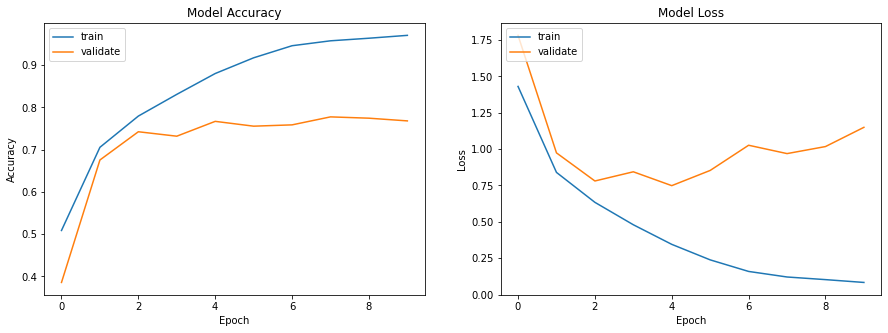

In [36]:
def plotmodelhistory(history): 
    fig, axs = plt.subplots(1,2,figsize=(15,5)) 
    # summarize history for accuracy
    axs[0].plot(history.history['accuracy']) 
    axs[0].plot(history.history['val_accuracy']) 
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy') 
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'validate'], loc='upper left')
    # summarize history for loss
    axs[1].plot(history.history['loss']) 
    axs[1].plot(history.history['val_loss']) 
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss') 
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.show()

plotmodelhistory(history_3)

## CNN Model 5

In [37]:
# Model_3 with Batch Normalization
model4 = Sequential()
model4.add(Conv2D(64,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model4.add(BatchNormalization())
model4.add(Conv2D(64,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2,2)))
model4.add(Dropout(0.2))
model4.add(Conv2D(128,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model4.add(BatchNormalization())
model4.add(Conv2D(128,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2,2)))
model4.add(Dropout(0.25))
model4.add(Conv2D(128,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model4.add(BatchNormalization())
model4.add(Conv2D(128,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2,2)))
model4.add(Dropout(0.35))
model4.add(Flatten())
model4.add(Dense(256, activation='relu'))
model4.add(BatchNormalization())
model4.add(Dropout(0.5))
model4.add(Dense(10, activation='softmax'))

model4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 32, 32, 64)        3136      
                                                                 
 batch_normalization_6 (Batc  (None, 32, 32, 64)       256       
 hNormalization)                                                 
                                                                 
 conv2d_17 (Conv2D)          (None, 32, 32, 64)        65600     
                                                                 
 batch_normalization_7 (Batc  (None, 32, 32, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                      

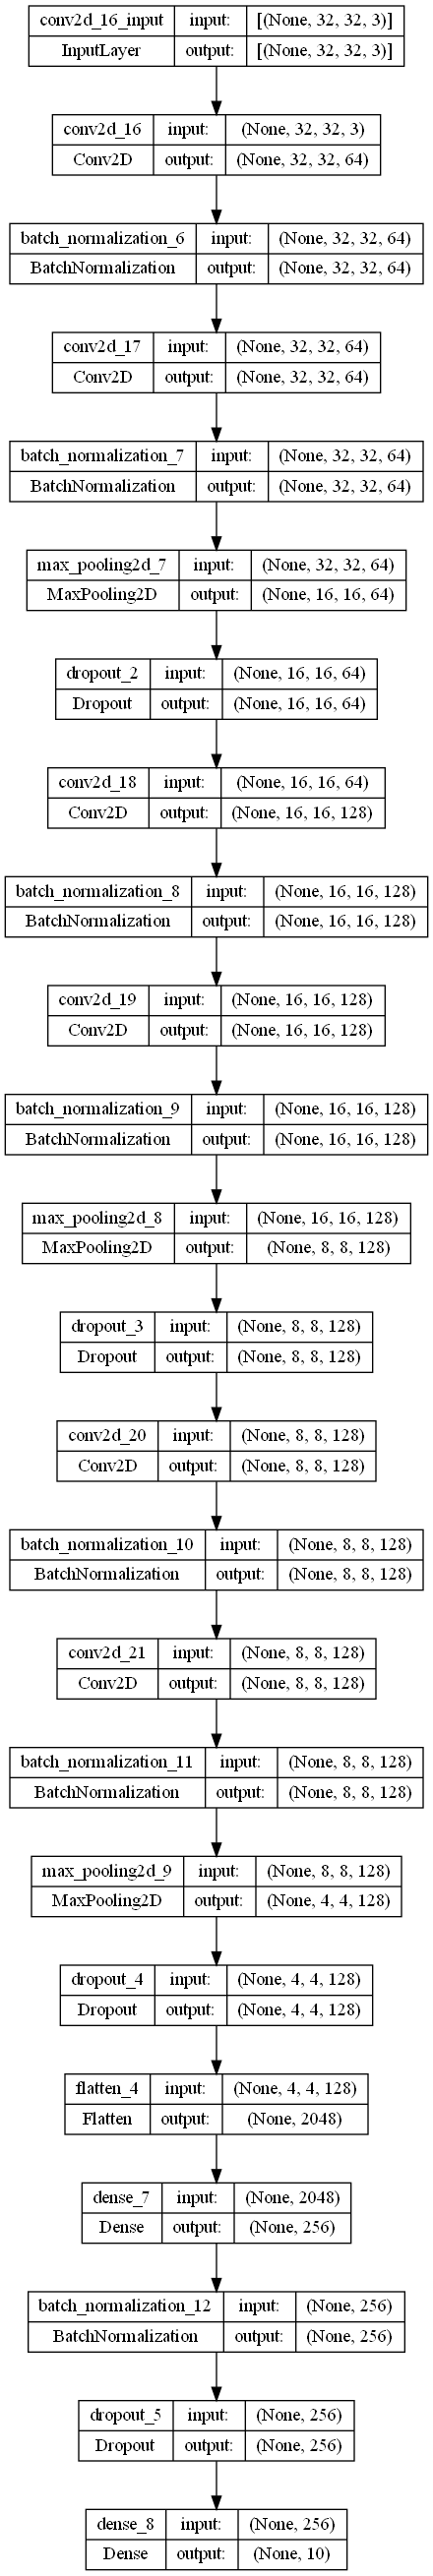

In [38]:
plot_model(model4, to_file='model_plot4.png', show_shapes=True, show_layer_names=True)

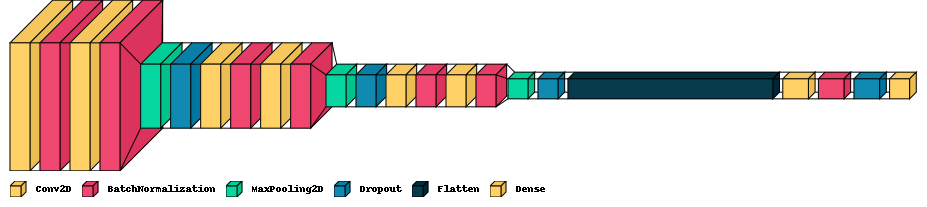

In [39]:
visualkeras.layered_view(model4, legend=True)

In [40]:
model4.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [41]:
history_4 = model4.fit(x_train, y_train, epochs = 10, batch_size = 128, verbose=1, validation_data=(x_test, y_test))

Epoch 1/10
391/391 [==============================] - 231s 587ms/step - loss: 1.6663 - accuracy: 0.4413 - val_loss: 2.3002 - val_accuracy: 0.2828
Epoch 2/10
391/391 [==============================] - 229s 586ms/step - loss: 1.0252 - accuracy: 0.6373 - val_loss: 1.0816 - val_accuracy: 0.6121
Epoch 3/10
391/391 [==============================] - 231s 591ms/step - loss: 0.7848 - accuracy: 0.7258 - val_loss: 0.7178 - val_accuracy: 0.7492
Epoch 4/10
391/391 [==============================] - 229s 585ms/step - loss: 0.6658 - accuracy: 0.7696 - val_loss: 1.0486 - val_accuracy: 0.6600
Epoch 5/10
391/391 [==============================] - 227s 581ms/step - loss: 0.5684 - accuracy: 0.8033 - val_loss: 0.7289 - val_accuracy: 0.7492
Epoch 6/10
391/391 [==============================] - 227s 582ms/step - loss: 0.5032 - accuracy: 0.8248 - val_loss: 0.6290 - val_accuracy: 0.7930
Epoch 7/10
391/391 [==============================] - 223s 572ms/step - loss: 0.4468 - accuracy: 0.8436 - val_loss: 0.6082 -

In [42]:
score4test = model4.evaluate(x_test, y_test)
score4train = model4.evaluate(x_train, y_train)
print('\n The loss on the test set is: ' + str(score4test[0]))
print('The accuracy on the test set is: ' + str(score4test[1]))
print('\n The loss on the train set is: ' + str(score4train[0]))
print('The accuracy on the train set is: ' + str(score4train[1]))

1563/1563 [==============================] - 64s 41ms/step - loss: 0.2866 - accuracy: 0.8989

 The loss on the test set is: 0.5879256129264832
The accuracy on the test set is: 0.8065000176429749

 The loss on the train set is: 0.28655189275741577
The accuracy on the train set is: 0.8988800048828125


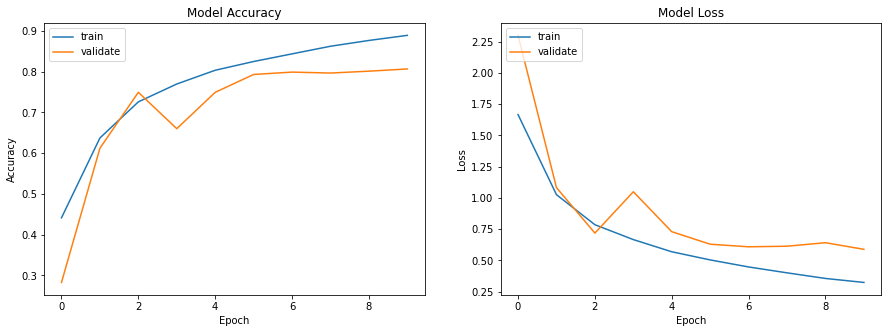

In [43]:
def plotmodelhistory(history): 
    fig, axs = plt.subplots(1,2,figsize=(15,5)) 
    # summarize history for accuracy
    axs[0].plot(history.history['accuracy']) 
    axs[0].plot(history.history['val_accuracy']) 
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy') 
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'validate'], loc='upper left')
    # summarize history for loss
    axs[1].plot(history.history['loss']) 
    axs[1].plot(history.history['val_loss']) 
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss') 
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.show()

plotmodelhistory(history_4)

In [44]:
from sklearn.metrics import classification_report, confusion_matrix

target_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# get predict prob and label 
ypred = model4.predict(x_train, verbose=1)
ypred = np.argmax(ypred, axis=1)

print('                         Train Set Results')
print(classification_report(np.argmax(y_train, axis=1), ypred, target_names=target_names))
print('The accuracy on the train set is: ' + str(score4train[1]))
print('The accuracy on the test set is: ' + str(score4test[1]))

1563/1563 [==============================] - 62s 40ms/step
                         Train Set Results
              precision    recall  f1-score   support

    airplane       0.94      0.88      0.91      5000
  automobile       0.90      0.99      0.94      5000
        bird       0.87      0.89      0.88      5000
         cat       0.86      0.76      0.81      5000
        deer       0.95      0.85      0.90      5000
         dog       0.86      0.86      0.86      5000
        frog       0.89      0.94      0.91      5000
       horse       0.82      0.98      0.89      5000
        ship       0.99      0.89      0.94      5000
       truck       0.94      0.94      0.94      5000

    accuracy                           0.90     50000
   macro avg       0.90      0.90      0.90     50000
weighted avg       0.90      0.90      0.90     50000

The accuracy on the train set is: 0.8988800048828125
The accuracy on the test set is: 0.8065000176429749


In [45]:
from sklearn.metrics import classification_report, confusion_matrix

target_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# get predict prob and label 
ypred = model4.predict(x_test, verbose=1)
ypred = np.argmax(ypred, axis=1)

print('                     Test Set Results')
print(classification_report(np.argmax(y_test, axis=1), ypred, target_names=target_names))
print('The accuracy on the train set is: ' + str(score4train[1]))
print('The accuracy on the test set is: ' + str(score4test[1]))

313/313 [==============================] - 13s 41ms/step
                     Test Set Results
              precision    recall  f1-score   support

    airplane       0.85      0.79      0.82      1000
  automobile       0.83      0.96      0.89      1000
        bird       0.73      0.74      0.74      1000
         cat       0.71      0.61      0.65      1000
        deer       0.85      0.73      0.78      1000
         dog       0.76      0.75      0.75      1000
        frog       0.81      0.88      0.84      1000
       horse       0.73      0.92      0.82      1000
        ship       0.94      0.82      0.88      1000
       truck       0.88      0.87      0.87      1000

    accuracy                           0.81     10000
   macro avg       0.81      0.81      0.80     10000
weighted avg       0.81      0.81      0.80     10000

The accuracy on the train set is: 0.8988800048828125
The accuracy on the test set is: 0.8065000176429749


In [47]:
print(f"Tensorflow version: {tensorflow.__version__}")
print(f"Keras Version: {tensorflow.keras.__version__}")
print("GPU is", "available" if tensorflow.config.list_physical_devices('GPU') else "NOT AVAILABLE")

Tensorflow version: 2.10.0
Keras Version: 2.10.0
GPU is NOT AVAILABLE


In [48]:
pred = model4.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(pred, axis=1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test, axis=1)

313/313 [==============================] - 12s 37ms/step


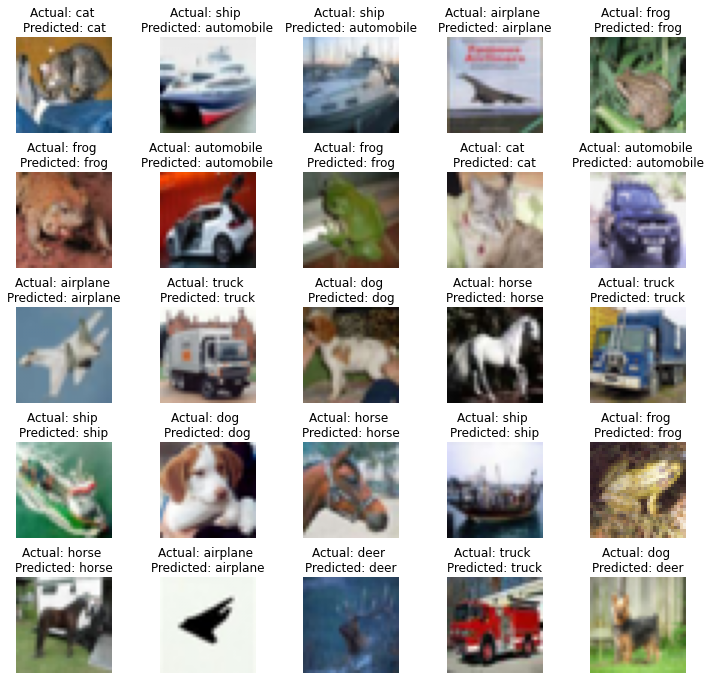

In [49]:
R = 5
C = 5
fig, axes = plt.subplots(R, C, figsize=(12,12))
axes = axes.ravel()

for i in np.arange(0, R*C):
    axes[i].imshow(x_test[i])
    axes[i].set_title("Actual: %s \nPredicted: %s" % (target_names[Y_true[i]], target_names[Y_pred_classes[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=.5)

In [50]:
def heatmap(data, row_labels, col_labels, ax=None, cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.
    """
    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)
    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)
    
    ax.set_xlabel('Predicted Label') 
    ax.set_ylabel('True Label')
    
    return im, cbar

def annotate_heatmap(im, data=None, fmt="d", threshold=None):
    """
    A function to annotate a heatmap.
    """
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            text = im.axes.text(j, i, format(data[i, j], fmt), horizontalalignment="center",
                                 color="white" if data[i, j] > thresh else "black")
            texts.append(text)

    return texts


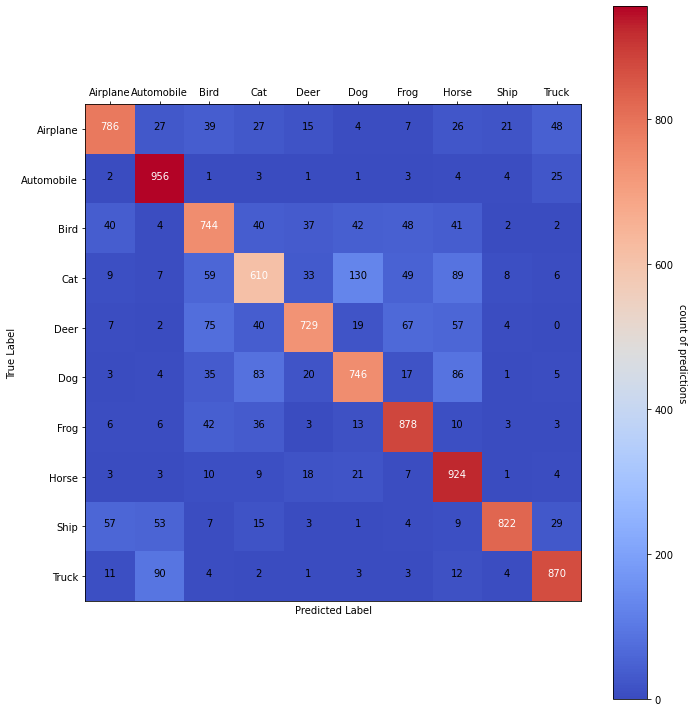

In [51]:
labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(pred, axis=1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test, axis=1)
# Errors are difference between predicted labels and true labels
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = pred[errors]
Y_true_errors = Y_true[errors]
X_test_errors = x_test[errors]

cm = confusion_matrix(Y_true, Y_pred_classes) 
thresh = cm.max() / 2.

fig, ax = plt.subplots(figsize=(10,10))
im, cbar = heatmap(cm, labels, labels, ax=ax,
                   cmap='coolwarm', cbarlabel="count of predictions")
texts = annotate_heatmap(im, data=cm, threshold=thresh)

fig.tight_layout()
plt.show()

In [52]:
model4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 32, 32, 64)        3136      
                                                                 
 batch_normalization_6 (Batc  (None, 32, 32, 64)       256       
 hNormalization)                                                 
                                                                 
 conv2d_17 (Conv2D)          (None, 32, 32, 64)        65600     
                                                                 
 batch_normalization_7 (Batc  (None, 32, 32, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                      